In [39]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"
import helpers.hp_tuning

%run "$imports_path"

In [41]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [42]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "tabGAN-qtr"

In [43]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    hp_info = fetch_hp_info(method=METHOD_NAME, version=8)
    curr_image_dir = os.path.join(const.dir.images_hp_v8(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v8(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v8(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/210 [00:00<?, ?it/s]

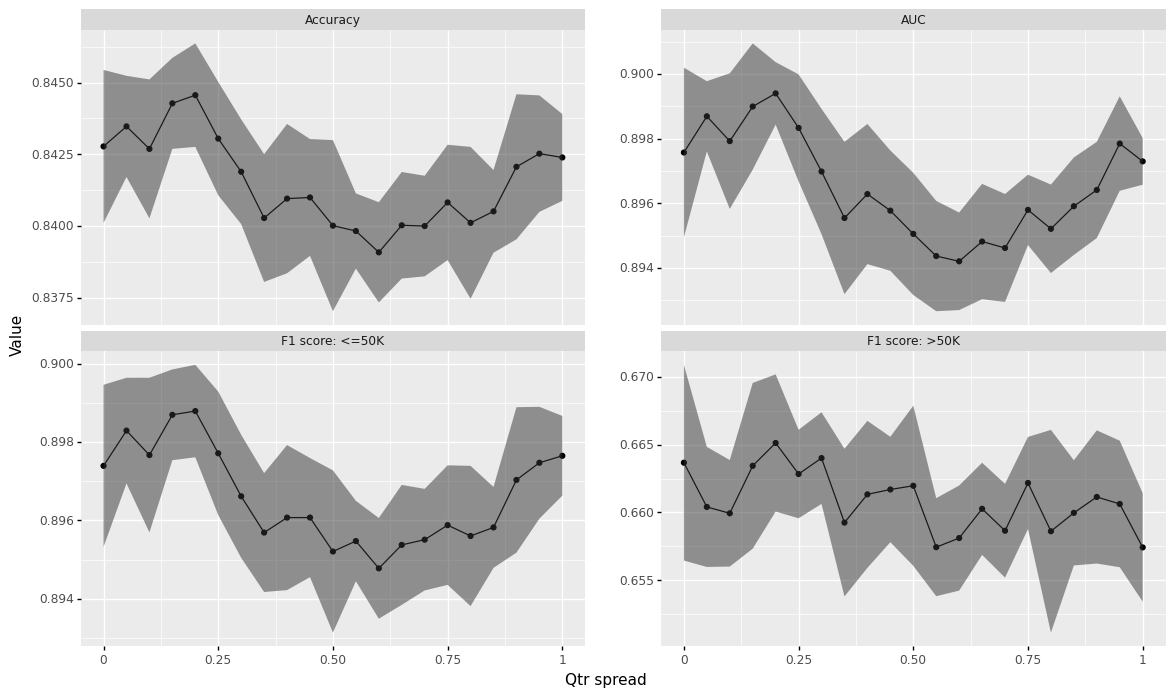

In [25]:
result_qtr_spread = plot_hp_tuning("qtr_spread")

In [26]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.842776,0.897569,0.780527,0.897392,0.663662,0.002666,0.002623,0.003906,0.002069,0.007196
1,0.05,0.843473,0.898688,0.779350,0.898291,0.660410,0.001763,0.001087,0.002449,0.001348,0.004415
2,0.10,0.842689,0.897921,0.778804,0.897667,0.659941,0.002421,0.002097,0.002307,0.001973,0.003918
3,0.15,0.844276,0.898991,0.781064,0.898695,0.663433,0.001586,0.001952,0.003175,0.001158,0.006093
4,0.20,0.844562,0.899397,0.781952,0.898790,0.665113,0.001804,0.000966,0.002953,0.001180,0.005045
5,0.25,0.843048,0.898330,0.780271,0.897712,0.662830,0.001975,0.001654,0.001985,0.001576,0.003253
6,0.30,0.841892,0.896981,0.780308,0.896615,0.664001,0.001825,0.001938,0.001746,0.001570,0.003368
7,0.35,0.840279,0.895543,0.777473,0.895689,0.659257,0.002227,0.002355,0.003277,0.001517,0.005430
8,0.40,0.840956,0.896284,0.778702,0.896071,0.661334,0.002602,0.002167,0.003389,0.001851,0.005404
9,0.45,0.840996,0.895771,0.778882,0.896072,0.661692,0.002036,0.001860,0.002425,0.001520,0.003878


  0%|          | 0/50 [00:00<?, ?it/s]

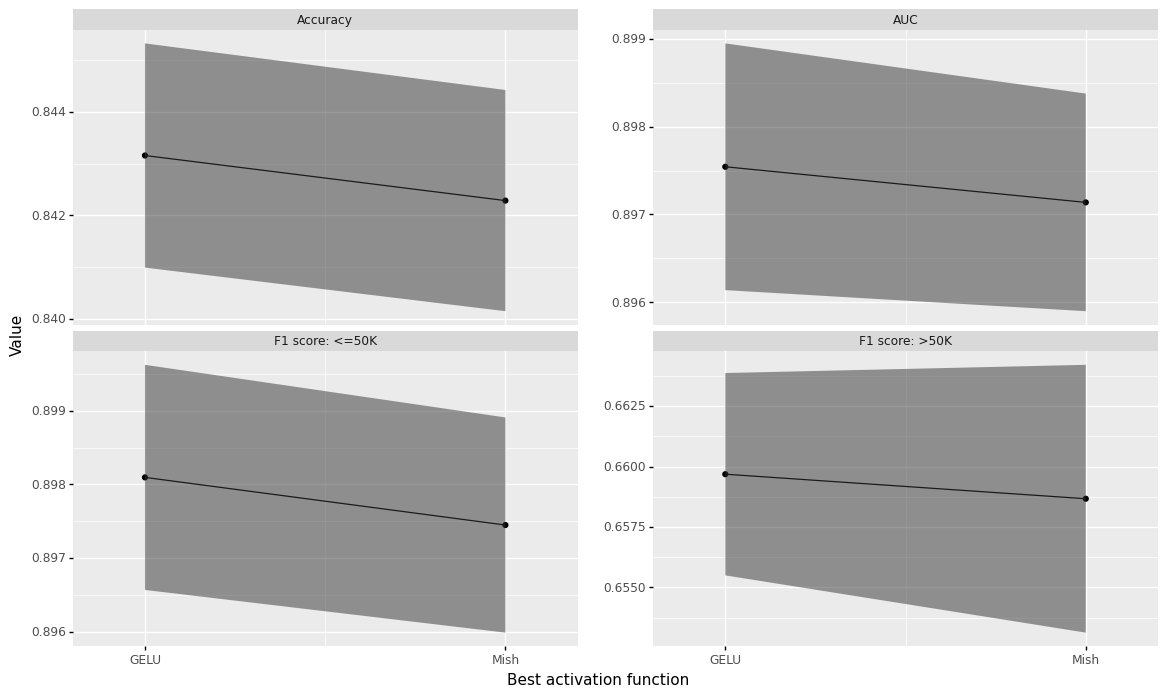

In [27]:
result_best_activation_function = plot_hp_tuning("best_activation_function")

In [28]:
result_best_activation_function

,Best activation function,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,GELU,0.843158,0.897544,0.778889,0.898095,0.659682,0.002166,0.001407,0.002716,0.001528,0.004185
1,Mish,0.842287,0.897138,0.778058,0.897448,0.658668,0.002137,0.001241,0.003264,0.001460,0.005539


  0%|          | 0/250 [00:00<?, ?it/s]

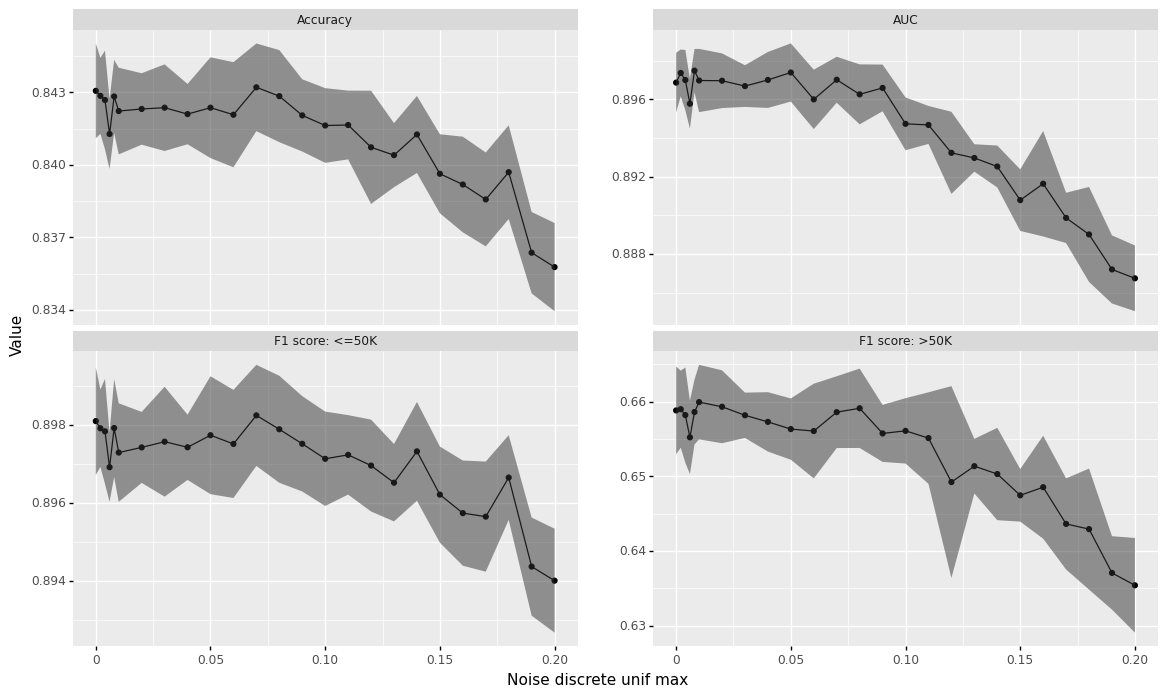

In [29]:
result_noise_discrete_unif_max = plot_hp_tuning("noise_discrete_unif_max")

  0%|          | 0/200 [00:00<?, ?it/s]

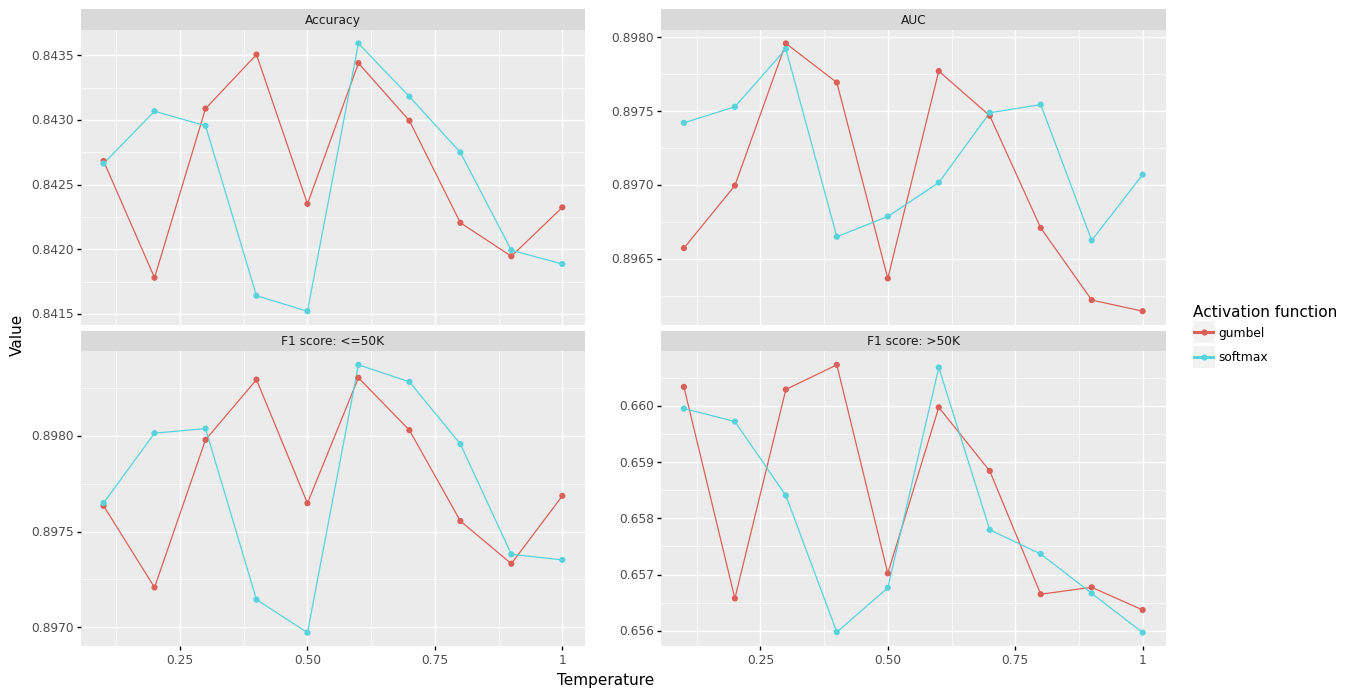

In [30]:
oh_encoding_result = plot_hp_tuning("oh_encoding")

  0%|          | 0/240 [00:00<?, ?it/s]

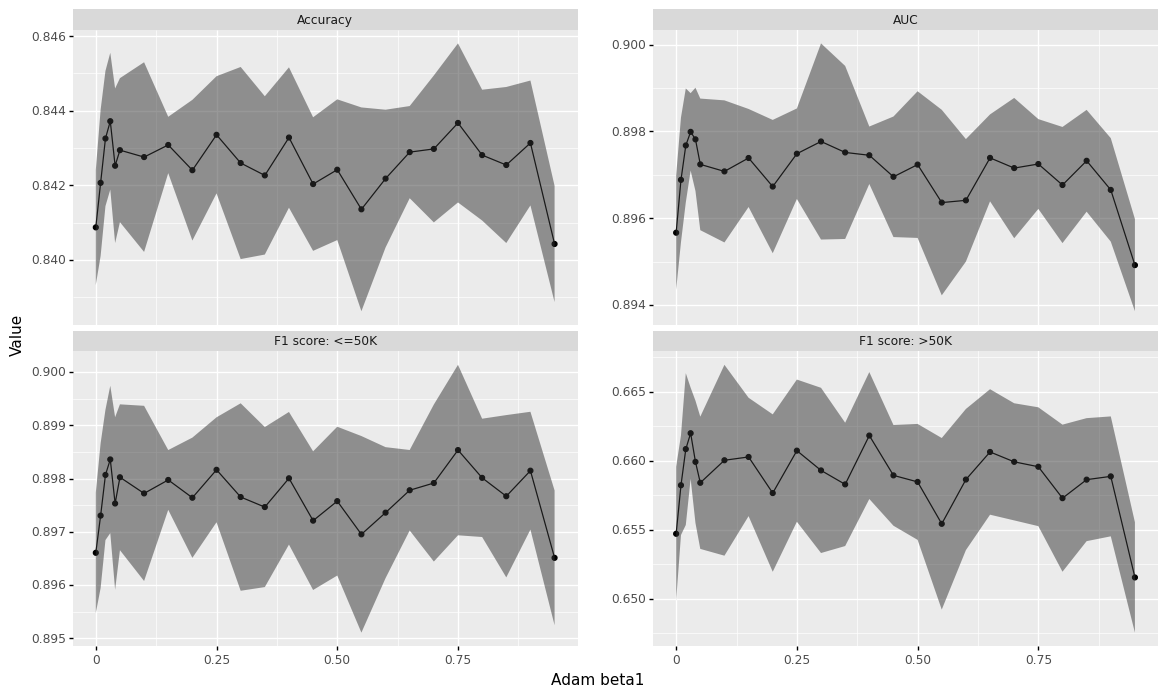

In [36]:
result_adam_beta1 = plot_hp_tuning("adam_beta1")

In [32]:
result_adam_beta1

,Adam beta1,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.01,0.842065,0.896883,0.777763,0.897304,0.658221,0.001960,0.001438,0.002432,0.001360,0.003607
1,0.02,0.843254,0.897676,0.779454,0.898069,0.660839,0.001813,0.001314,0.003099,0.001224,0.005495
2,0.03,0.843718,0.897990,0.780173,0.898360,0.661987,0.001835,0.000892,0.002083,0.001384,0.003300
3,0.04,0.842523,0.897817,0.778723,0.897532,0.659915,0.002073,0.001190,0.002524,0.001621,0.004430
4,0.05,0.842942,0.897240,0.778212,0.898025,0.658399,0.001931,0.001517,0.002802,0.001370,0.004788
5,0.10,0.842756,0.897078,0.778875,0.897721,0.660029,0.002544,0.001638,0.004107,0.001646,0.006911
6,0.15,0.843081,0.897387,0.779122,0.897974,0.660269,0.000756,0.001130,0.002125,0.000562,0.004287
7,0.20,0.842404,0.896728,0.777647,0.897640,0.657654,0.001887,0.001537,0.003350,0.001129,0.005700
8,0.25,0.843353,0.897485,0.779445,0.898165,0.660725,0.001571,0.001043,0.002909,0.000986,0.005148
9,0.30,0.842596,0.897768,0.778474,0.897653,0.659294,0.002577,0.002261,0.003672,0.001761,0.005982


  0%|          | 0/200 [00:00<?, ?it/s]

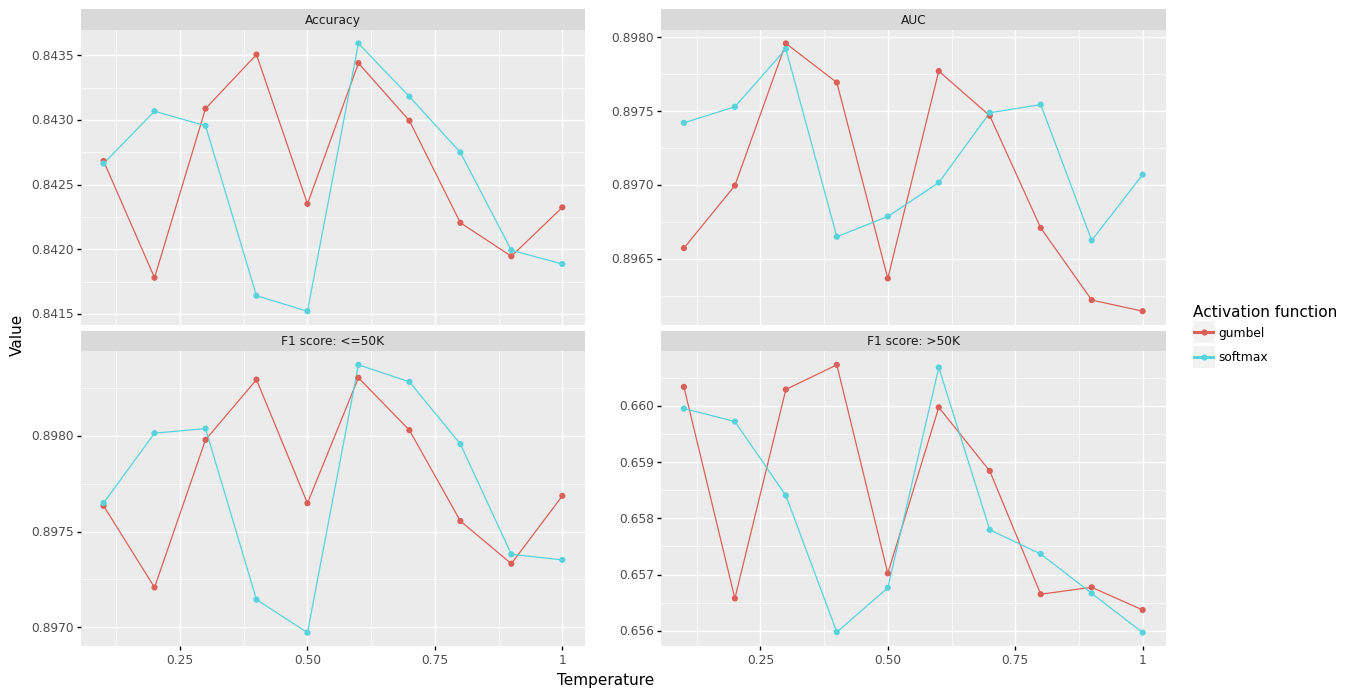

In [33]:
result_oh_encoding = plot_hp_tuning("oh_encoding")

  0%|          | 0/75 [00:00<?, ?it/s]

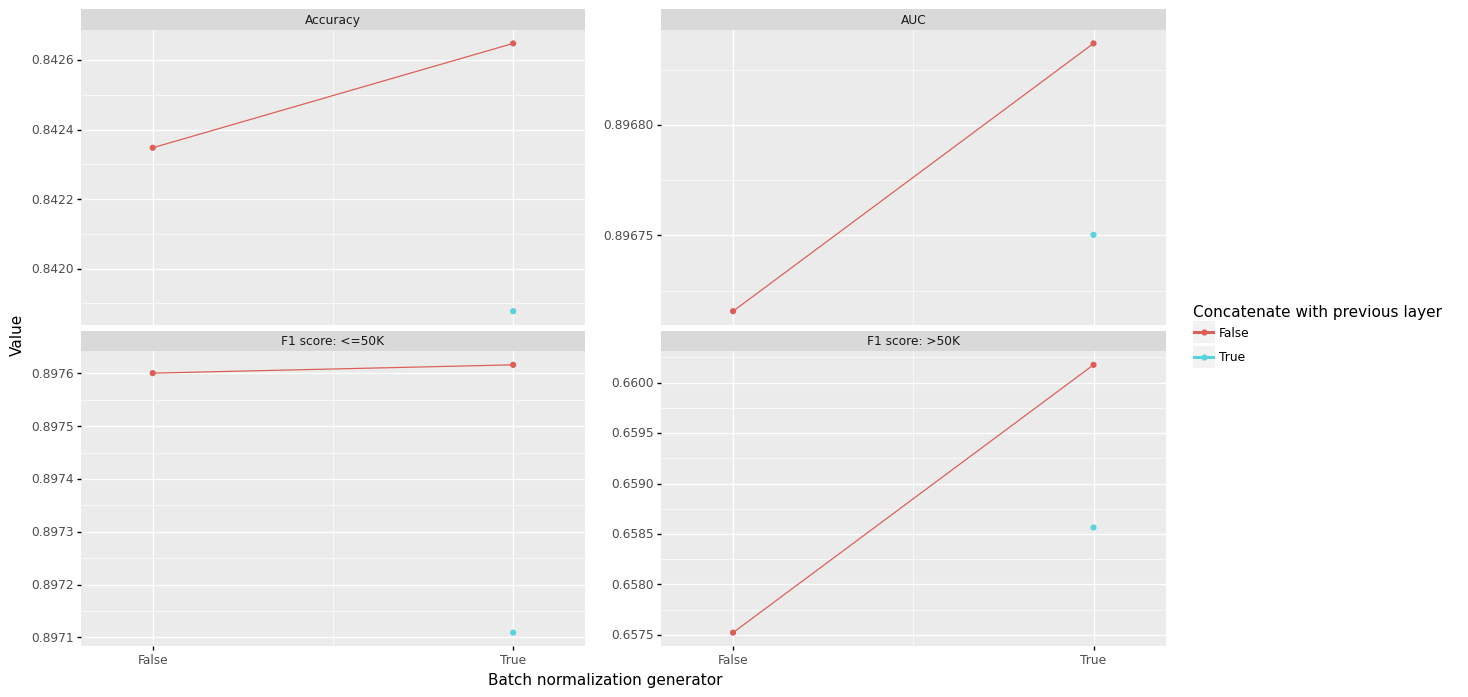

In [37]:
result_BN = plot_hp_tuning("BN")

In [35]:
result_BN

,Batch normalization generator,Concatenate with previous layer,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,False,0.842835,0.897097,0.777862,0.897993,0.657730,0.001965,0.001022,0.003623,0.001271,0.006465
1,True,False,0.842032,0.896405,0.778634,0.897091,0.660176,0.001685,0.001673,0.002854,0.001257,0.005336
2,True,True,0.841507,0.896313,0.777388,0.896852,0.657923,0.001756,0.001282,0.002425,0.001381,0.004505


  0%|          | 0/60 [00:00<?, ?it/s]

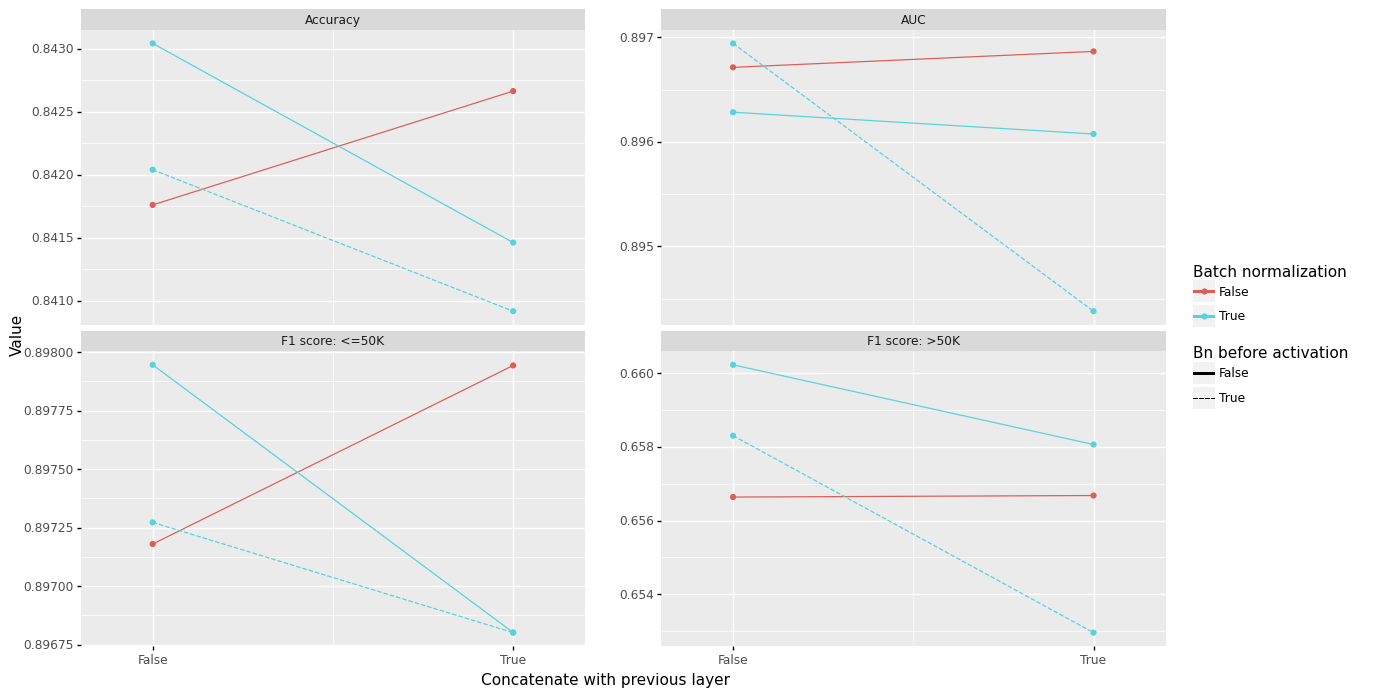

In [38]:
result_BN_advanced = plot_hp_tuning("BN_advanced")

  0%|          | 0/125 [00:00<?, ?it/s]

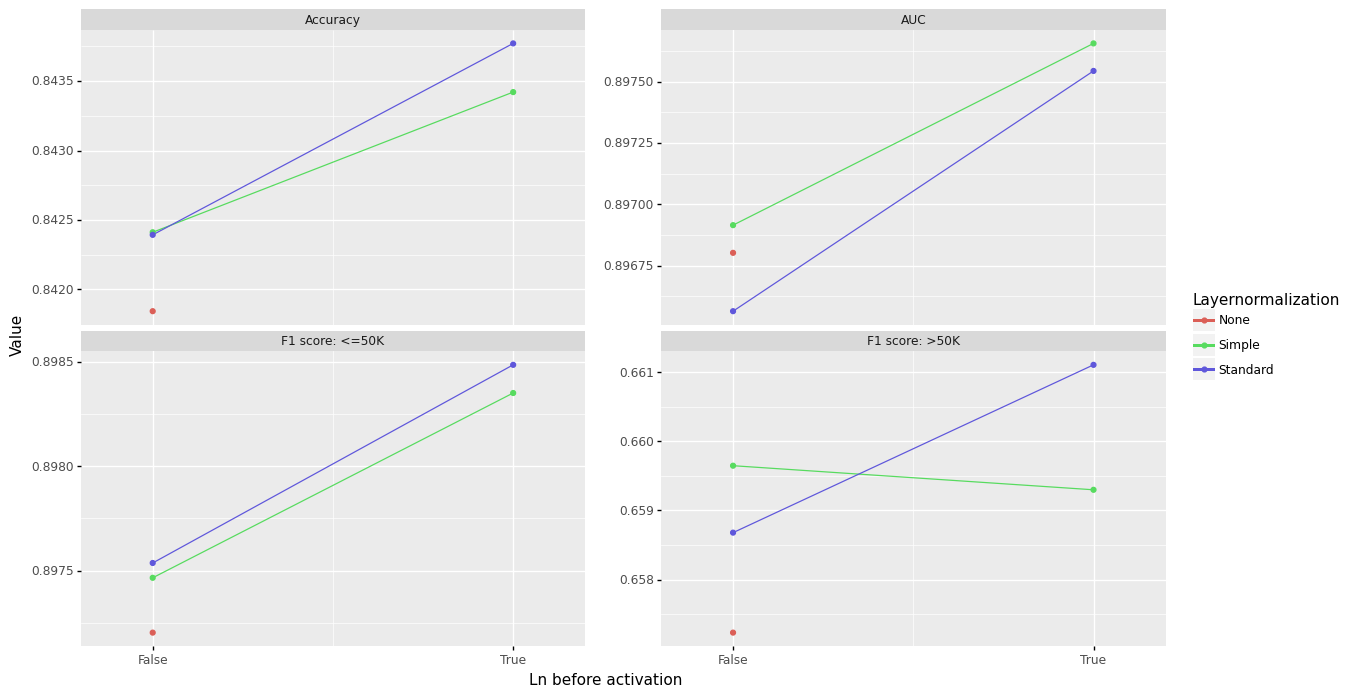

In [45]:
result_LN_advanced = plot_hp_tuning("LN_advanced")